In [1]:
%pylab inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.font_manager import FontProperties
import collections
import seaborn as sns
mycolors = [
    '#e41a1c',
    '#377eb8',
    '#4daf4a',
    '#984ea3',
    '#d3d3d3']

Populating the interactive namespace from numpy and matplotlib


In [31]:
cn31 = np.array([[2.48768822e+05, 2.51327024e+05, 2.39608014e+05],
                [2.51327024e+05, 2.76064048e+05, 2.52775697e+05],
                [2.39608014e+05, 2.52775697e+05, 2.60756109e+05]])

In [32]:
mc13 = np.array([[2.41332659e+05, 2.32350141e+05, 2.20521366e+05],
                 [2.32350141e+05, 2.54176409e+05, 2.30719471e+05],
                 [2.20521366e+05, 2.30719471e+05, 2.45848607e+05]])

In [33]:
dem3 = np.array([[3.43946615e+05, 3.31239191e+05, 3.26938942e+05],
                 [3.31239191e+05, 3.37049312e+05, 3.23685263e+05],
                 [3.26938942e+05, 3.23685263e+05, 3.35097317e+05]])

In [34]:
mcmcde = np.array([[3.31693967e+05, 3.12880975e+05, 2.98077221e+05],
                   [3.12880975e+05, 3.10704437e+05, 2.94891061e+05],
                   [2.98077221e+05, 2.94891061e+05, 3.04767688e+05]])

In [5]:
cn32 = np.array([[2.48768822e+05, 2.51327024e+05, 2.39608014e+05],
                [9.59042709e-01, 2.76064048e+05, 2.52775697e+05],
                [9.40779454e-01, 9.42138527e-01, 2.60756109e+05]])

array([[  2.48768822e+05,   2.51327024e+05,   2.39608014e+05],
       [  9.59042709e-01,   2.76064048e+05,   2.52775697e+05],
       [  9.40779454e-01,   9.42138527e-01,   2.60756109e+05]])

In [25]:
mask = np.zeros_like(cn31)
mask[np.tril_indices_from(mask, k=-1)] = True
# mask[np.triu_indices_from(mask)] = True

In [74]:
max(mcmcde.max(), cn31.max(), mc13.max(), dem3.max())

343946.61499999999

In [75]:
min(mcmcde.min(), cn31.min(), mc13.min(), dem3.min())

220521.36600000001

In [ ]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Abalone Feature Correlation')
    labels=['Sex','Length','Diam','Height','Whole','Shucked','Viscera','Shell','Rings',]
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(df)

[[ 0.72327742  0.73071521  0.69664304]
 [ 0.73071521  0.80263633  0.73492713]
 [ 0.69664304  0.73492713  0.7581296 ]]
[[ 0.70165732  0.67554129  0.64114998]
 [ 0.67554129  0.73899959  0.67080024]
 [ 0.64114998  0.67080024  0.71478711]]
[[ 1.          0.96305408  0.95055142]
 [ 0.96305408  0.97994659  0.94109158]
 [ 0.95055142  0.94109158  0.9742713 ]]
[[ 0.96437631  0.90967889  0.86663804]
 [ 0.90967889  0.90335076  0.85737451]
 [ 0.86663804  0.85737451  0.88609009]]


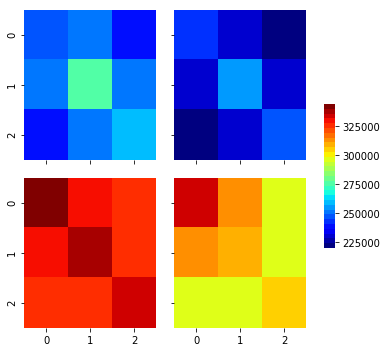

In [94]:
from matplotlib import cm as cm
fig, axn = plt.subplots(2, 2, sharex=True, sharey=True)
fig.set_size_inches(5, 5)
cbar_ax = fig.add_axes([.91, .3, .03, .4])
data = [cn31, mc13, dem3, mcmcde]
cmap = cm.get_cmap('jet', 30)
for i, ax in enumerate(axn.flat):
    print(data[i]/343946.61499999999)
    sns.heatmap(data[i], ax=ax,
                cbar=i == 0,
                vmin=220521.36600000001, vmax=343946.61499999999,
                cmap=cmap,
                cbar_ax=None if i else cbar_ax)

fig.tight_layout(rect=[0, 0, .9, 1])
fig.savefig('results/alice.pdf')

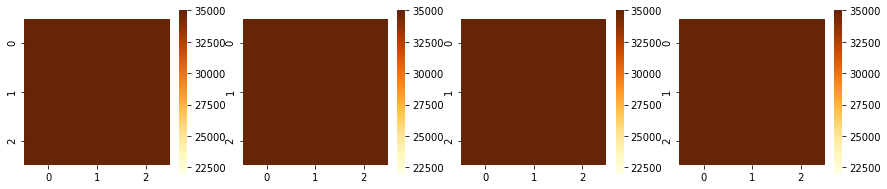

In [43]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
cbar_ax = fig.add_axes([.91, .3, .03, .4])

fig.set_size_inches(15, 3)
sns.heatmap((cn31), square=True, 
            vmin=22000,
            vmax=35000,
            cmap="YlOrBr", ax=axes[0])
sns.heatmap((mc13), square=True, 
             vmin=22000,
            vmax=35000,
            cmap="YlOrBr", ax=axes[1])
sns.heatmap((dem3), square=True, 
             vmin=22000,
            vmax=35000,
            cmap="YlOrBr", ax=axes[2])
sns.heatmap((mcmcde), square=True,
             vmin=22000,
            vmax=35000,
            cmap="YlOrBr", ax=axes[3])
fig.savefig('results/covariance.pdf')

In [ ]:
corr = np.corrcoef(np.random.randn(10, 200))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
...     ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)